Rong Wang, rongwww, 1619779944

<b>1. Decision Trees as Interpretable Models</b>

(a) Download the Accute Inflamations data from https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations.

(b) Build a decision tree on the whole data set and plot it.

This data set is a multi-label data set. Sk-Learn seems to support building multi-label decision trees. Alternatively, you can use the label powerset method to convert it to a multiclass data set. Also, you can use the binary relevance method and build one decision tree for each label. It seems that the label powerset approach is more relevant here. Is that right?

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
# %matplotlib inline
import matplotlib.pyplot as plt# ,pydotplus
from sklearn import tree, metrics, model_selection, preprocessing
from sklearn.impute import SimpleImputer
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [102]:
# reference: https://notebooks.githubusercontent.com/view/ipynb?browser=chrome&color_mode=auto&commit=de148849bf1ca9e87c719eb3831709a943cd848a&device=unknown&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6976697368616c616e616e642f4665646572617465642d4c6561726e696e672d6f6e2d486f73706974616c2d446174612f646531343838343962663163613965383763373139656233383331373039613934336364383438612f7365636f6e645f7265766973696f6e2e6970796e62&logged_in=false&nwo=ivishalanand%2FFederated-Learning-on-Hospital-Data&path=second_revision.ipynb&platform=android&repository_id=218556509&repository_type=Repository&version=98

# data = pd.read_csv("../data/diagnosis.csv", 'r', encoding='UTF-8', errors='ignore')

data = []
# with open("../data/diagnosis.csv", encoding="utf8", errors='ignore') as f:
with open("../data/diagnosis.csv", 'rb') as f:
    content = f.read().decode('utf-16')
    lines = content.split("\r\n")
    for i in lines:
        line = i.split("\t")
        if len(line) == 8:
            a, b = line[0].split(",")
            line[0] = int(a) + int(b)*0.1
            data.append(line)
df = pd.DataFrame(data)
df = df.replace('yes', 1)
df = df.replace('no', 0)
df.columns = ["Temperature", "Nausea", "Lumbar pain", "Urine pushing", 
              "Micturition pains", "Burning of urethra, itch, swelling of urethra outlet", 
              "decision: Inflammation of urinary bladder", "decision: Nephritis of renal pelvis origin"]
x = df[["Temperature", "Nausea", "Lumbar pain", "Urine pushing", 
              "Micturition pains", "Burning of urethra, itch, swelling of urethra outlet"]]
y = df[["decision: Inflammation of urinary bladder","decision: Nephritis of renal pelvis origin"]]
y1 = df[["decision: Inflammation of urinary bladder"]]
y2 = df[["decision: Nephritis of renal pelvis origin"]]
df

# a1 Temperature of patient { 35C-42C }
# a2 Occurrence of nausea { yes, no }
# a3 Lumbar pain { yes, no }
# a4 Urine pushing (continuous need for urination) { yes, no }
# a5 Micturition pains { yes, no }
# a6 Burning of urethra, itch, swelling of urethra outlet { yes, no }
# d1 decision: Inflammation of urinary bladder { yes, no }
# d2 decision: Nephritis of renal pelvis origin { yes, no }

,Temperature,Nausea,Lumbar pain,Urine pushing,Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",decision: Inflammation of urinary bladder,decision: Nephritis of renal pelvis origin
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1
116,41.5,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1
118,41.5,0,1,1,0,1,0,1


In [103]:
! pip install scikit-multilearn

In [104]:
# reference: https://towardsdatascience.com/visualizing-decision-trees-in-jupyter-notebook-with-python-and-graphviz-78703230a7b1
# reference: doc from the professor
from sklearn.tree import DecisionTreeClassifier
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import export_graphviz
# import pydotplus
model = DecisionTreeClassifier(criterion='entropy') # criterion='entropy'
model.fit(x, y)
export_graphviz(model, 'tree.dot', feature_names = df.columns[:6])

model1 = DecisionTreeClassifier(criterion='entropy') # criterion='entropy'
model1.fit(x, y1)
export_graphviz(model1, 'tree1.dot', feature_names = df.columns[:6])

model2 = DecisionTreeClassifier(criterion='entropy') # criterion='entropy'
model2.fit(x, y2)
export_graphviz(model2, 'tree2.dot', feature_names = df.columns[:6])

# ddata = export_graphviz(model, out_file=None, filled=True, rounded=True, feature_names = df.columns[:6])
# graph = pydotplus.graph_from_dot_graph(ddata)
# display(Image(graph.create_png()))

In [105]:
# ! sudo apt-get install graphviz
# ! sudo pip install pydot
# ! dot -Tpng tree.dot -o tree.png

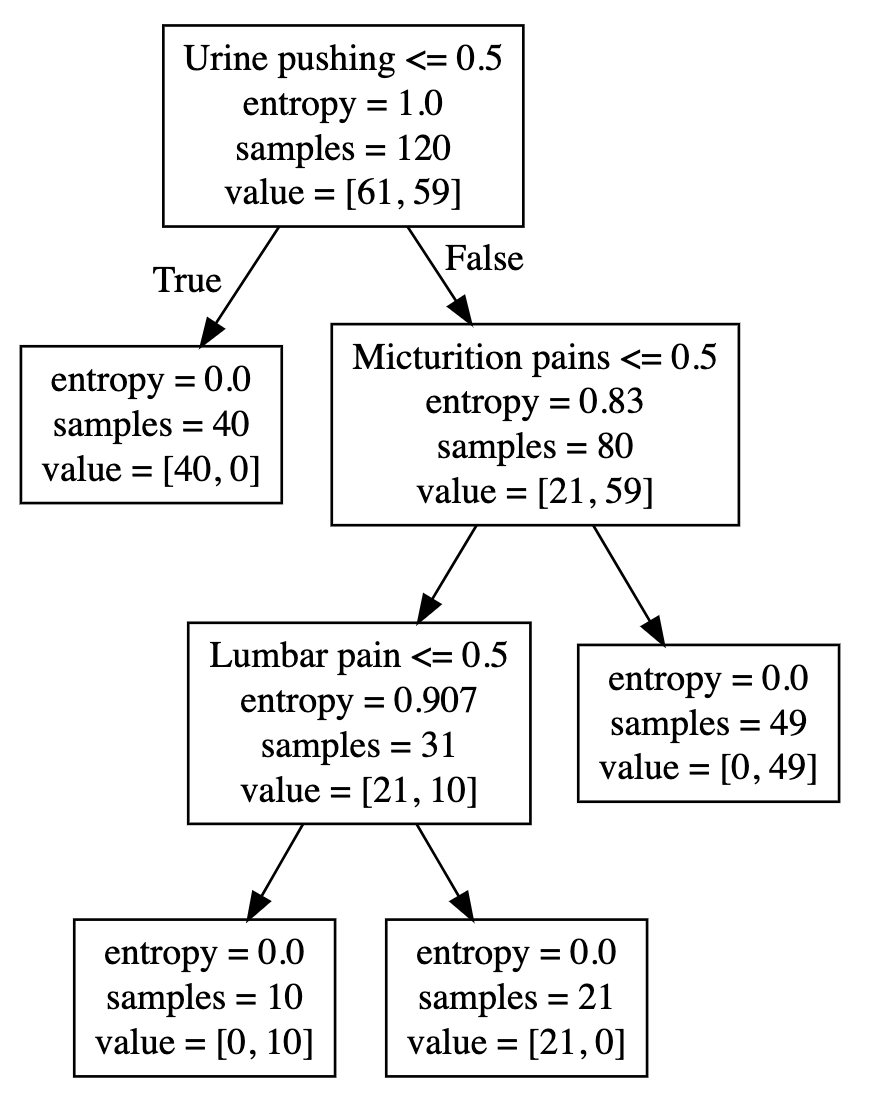

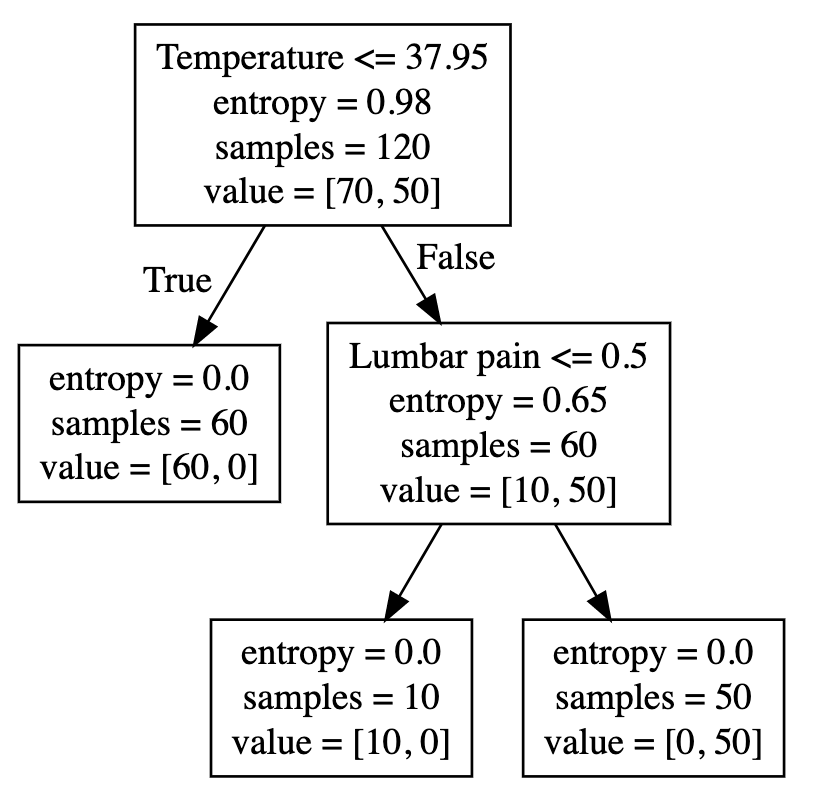

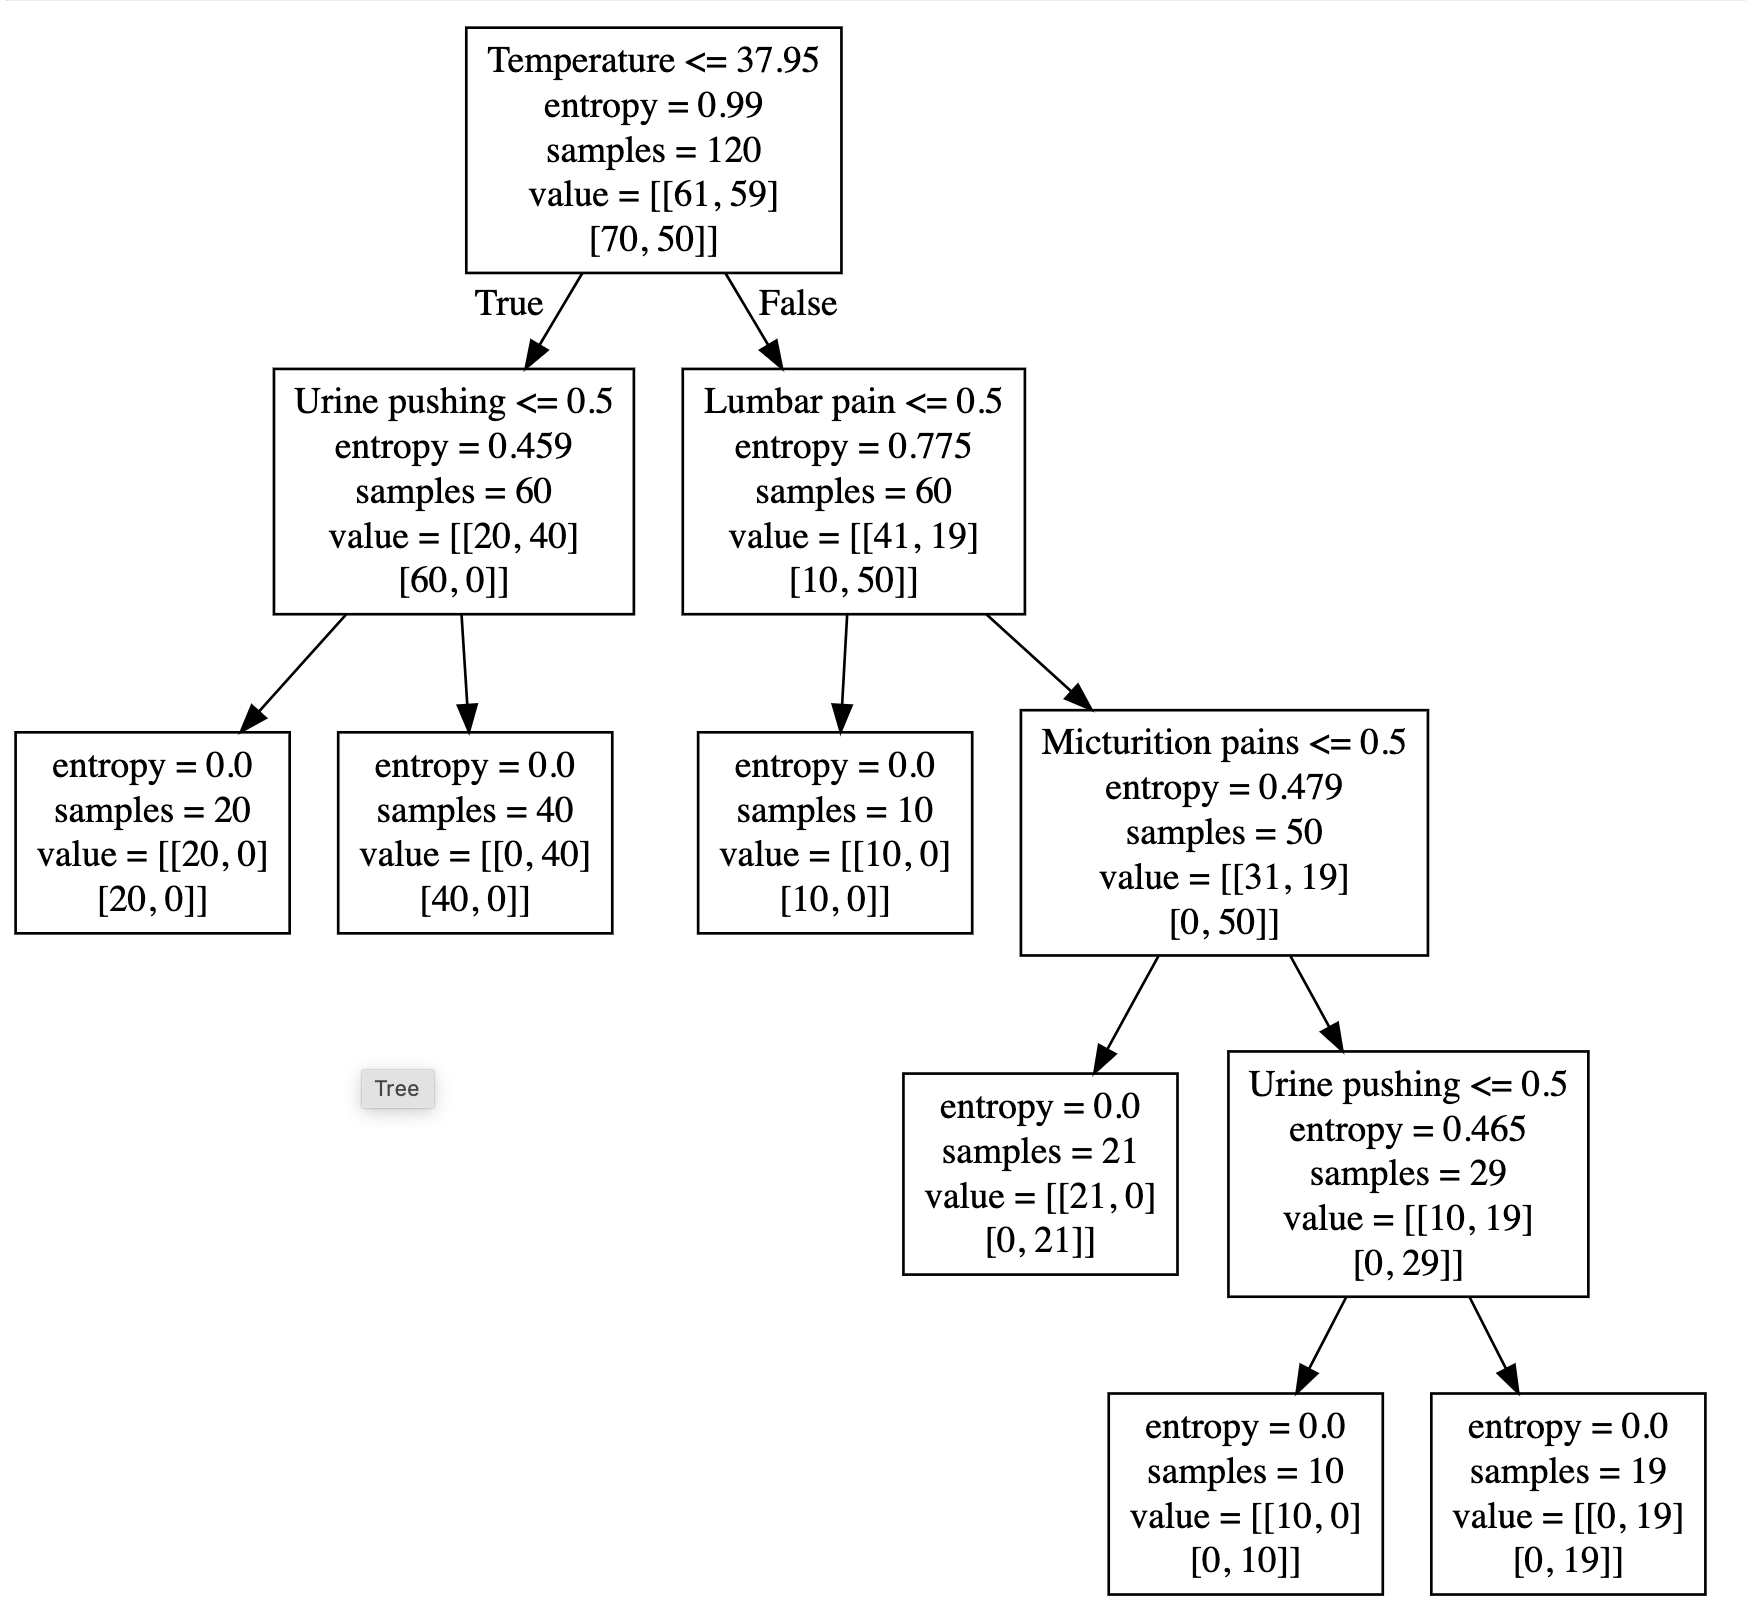

(c) Convert the decision rules into a set of IF-THEN rules.

can reference: https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html

In [106]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):

	'''
	Outputs a decision tree model as a Python function
	
	Parameters:
	-----------
	tree: decision tree model
		The decision tree to represent as a function
	feature_names: list
		The feature names of the dataset used for building the decision tree
	'''

	tree_ = tree.tree_
	feature_name = [
		feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
		for i in tree_.feature
	]
	print("def tree({}):".format(", ".join(feature_names)))

	def recurse(node, depth):
		indent = "  " * depth
		if tree_.feature[node] != _tree.TREE_UNDEFINED:
			name = feature_name[node]
			threshold = tree_.threshold[node]
			print("{}if {} <= {}:".format(indent, name, threshold))
			recurse(tree_.children_left[node], depth + 1)
			print("{}else:  # if {} > {}".format(indent, name, threshold))
			recurse(tree_.children_right[node], depth + 1)
		else:
			print("{}return {}".format(indent, tree_.value[node]))

	recurse(0, 1)
    
print("For Tree 1")
tree_to_code(model1, list(df.columns[:6]))
print("\nFor Tree 2")
tree_to_code(model2, list(df.columns[:6]))

For Tree 1
def tree(Temperature, Nausea, Lumbar pain, Urine pushing, Micturition pains, Burning of urethra, itch, swelling of urethra outlet):
  if Urine pushing <= 0.5:
    return [[40.  0.]]
  else:  # if Urine pushing > 0.5
    if Micturition pains <= 0.5:
      if Temperature <= 37.95000076293945:
        return [[ 0. 10.]]
      else:  # if Temperature > 37.95000076293945
        return [[21.  0.]]
    else:  # if Micturition pains > 0.5
      return [[ 0. 49.]]

For Tree 2
def tree(Temperature, Nausea, Lumbar pain, Urine pushing, Micturition pains, Burning of urethra, itch, swelling of urethra outlet):
  if Temperature <= 37.95000076293945:
    return [[60.  0.]]
  else:  # if Temperature > 37.95000076293945
    if Lumbar pain <= 0.5:
      return [[10.  0.]]
    else:  # if Lumbar pain > 0.5
      return [[ 0. 50.]]


(d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability.

For Tree 1
Number of nodes in the last tree is: 1 with ccp_alpha: 0.2536675938125214


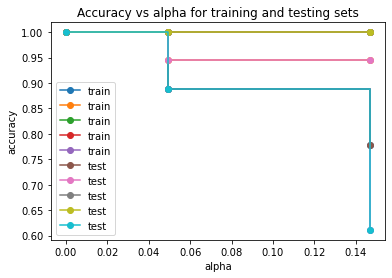


For Tree 2
Number of nodes in the last tree is: 1 with ccp_alpha: 0.3614394536380352


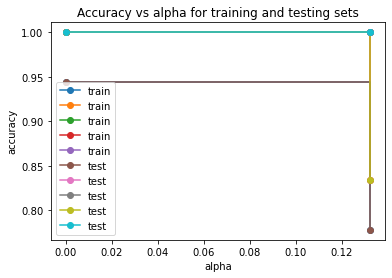

For decision 1 and 2 together.
Number of nodes in the last tree is: 1 with ccp_alpha: 0.20134030946664955


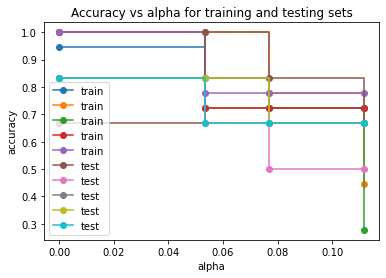

In [107]:
from sklearn.model_selection import train_test_split

print("For Tree 1")
X_train, X_test, y_train, y_test = train_test_split(x, y1, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Next, train a decision tree using the effective alphas. The last value in ccp_alphas is the 
# alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

# Remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node.
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Accuracy vs alpha for training and testing sets.
# train_scores = [clf.score(X_train, y_train) for clf in clfs]
# test_scores = [clf.score(X_test, y_test) for clf in clfs]

train_scores = [cross_val_score(clf, X_train, y_train, cv=5) for clf in clfs]
test_scores = [cross_val_score(clf, X_train, y_train, cv=5) for clf in clfs]

# train_scores = [cross_val_score(clf, x, y, cv=5) for clf in clfs]
# test_scores = [cross_val_score(clf, x, y, cv=5) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()


print("\nFor Tree 2")
X_train, X_test, y_train, y_test = train_test_split(x, y2, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Next, train a decision tree using the effective alphas. The last value in ccp_alphas is the 
# alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

# Remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node.
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Accuracy vs alpha for training and testing sets.
# train_scores = [clf.score(X_train, y_train) for clf in clfs]
# test_scores = [clf.score(X_test, y_test) for clf in clfs]
train_scores = [cross_val_score(clf, X_train, y_train, cv=5) for clf in clfs]
test_scores = [cross_val_score(clf, X_train, y_train, cv=5) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()


print("For decision 1 and 2 together.")
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Next, train a decision tree using the effective alphas. The last value in ccp_alphas is the 
# alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

# Remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node.
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Accuracy vs alpha for training and testing sets.
# train_scores = [clf.score(X_train, y_train) for clf in clfs]
# test_scores = [clf.score(X_test, y_test) for clf in clfs]
train_scores = [cross_val_score(clf, X_train, y_train, cv=5) for clf in clfs]
test_scores = [cross_val_score(clf, X_test, y_test, cv=5) for clf in clfs]
# train_scores = [cross_val_score(clf, x, y, cv=5) for clf in clfs]
# test_scores = [cross_val_score(clf, x, y, cv=5) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Because when doing seperatly with two trees, the graph is pretty simple, so I also show the tree with both two decisions above, just for reference.

As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. For tree 1,  set ccp_alpha=0.04, for tree 2, set ccp_alpha=0.12, to maximize the testing accuracy.

In [108]:
clf1 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.04)
X_train, X_test, y_train, y_test = train_test_split(x, y1, random_state=0)
clf1.fit(X_train, y_train)
y_train_pred = clf1.predict(X_train)
y_test_pred = clf1.predict(X_test)
print(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred))

clf2 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.12)
X_train, X_test, y_train, y_test = train_test_split(x, y2, random_state=0)
clf2.fit(X_train, y_train)
y_train_pred = clf2.predict(X_train)
y_test_pred = clf2.predict(X_test)
print(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred))

1.0 1.0
1.0 1.0


In [109]:
print("For Tree 1:")
tree_to_code(clf1, list(df.columns[:6]))
print("\nFor Tree 2:")
tree_to_code(clf2, list(df.columns[:6]))

For Tree 1:
def tree(Temperature, Nausea, Lumbar pain, Urine pushing, Micturition pains, Burning of urethra, itch, swelling of urethra outlet):
  if Micturition pains <= 0.5:
    if Lumbar pain <= 0.5:
      if Urine pushing <= 0.5:
        return [[7. 0.]]
      else:  # if Urine pushing > 0.5
        return [[0. 5.]]
    else:  # if Lumbar pain > 0.5
      return [[32.  0.]]
  else:  # if Micturition pains > 0.5
    if Urine pushing <= 0.5:
      return [[8. 0.]]
    else:  # if Urine pushing > 0.5
      return [[ 0. 38.]]

For Tree 2:
def tree(Temperature, Nausea, Lumbar pain, Urine pushing, Micturition pains, Burning of urethra, itch, swelling of urethra outlet):
  if Temperature <= 37.95000076293945:
    return [[43.  0.]]
  else:  # if Temperature > 37.95000076293945
    if Lumbar pain <= 0.5:
      return [[7. 0.]]
    else:  # if Lumbar pain > 0.5
      return [[ 0. 40.]]


<b>2. The LASSO and Boosting for Regression</b>

(a) Download the Communities and Crime data3 from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as the training set and the rest as the test set.

In [110]:
crime_dataset = pd.read_csv('../data/communities.data', header = None)
crime_dataset = crime_dataset.replace('?' , np.nan)
trainset = crime_dataset[0:1495]
testset = crime_dataset[1495:]

cols = ['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop']

trainset
# testset

# with open('../data/communities.data', "rb") as f:
#     print(f.read())

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,6,NaN,NaN,Hillsboroughtown,8,0.00,0.59,0.01,0.69,1.00,...,0.02,0.14,0.22,NaN,NaN,NaN,NaN,0.00,NaN,0.03
1491,6,NaN,NaN,Orangecity,8,0.16,0.62,0.03,0.74,0.48,...,0.07,0.40,0.14,0.07,0.05,0.85,0.5,0.61,0.19,0.20
1492,13,NaN,NaN,Waycrosscity,8,0.01,0.36,0.95,0.24,0.03,...,0.03,0.12,0.01,NaN,NaN,NaN,NaN,0.00,NaN,0.30
1493,39,85,49056,Mentorcity,8,0.06,0.53,0.01,0.98,0.05,...,0.08,0.15,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


(b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

According to the data description:
    
Attribute Information: (122 predictive, 5 non-predictive, 1 goal)

-- state: US state (by number) - not counted as predictive above, but if considered, should be consided nominal (nominal)

-- county: numeric code for county - not predictive, and many missing values (numeric)

-- community: numeric code for community - not predictive and many missing values (numeric)

-- communityname: community name - not predictive - for information only (string)

-- fold: fold number for non-random 10 fold cross validation, potentially useful for debugging, paired tests - not predictive (numeric)

In [111]:
crime_dataset_predictive = crime_dataset.iloc[:, 5:] # delete first 5 cols.
trainset_predictive = trainset.iloc[:, 5:]
testset_predictive = testset.iloc[:, 5:]
cols_predictive = cols[5:]
# shouldn’t learn anything from the test dataset. 
# Hence the right way is first to create the imputer fitted on the train data, 
# and then deal with the missing data on your test data using the imputer fitted on your training data.

# If there are more than 80% missing values in a specific feature, it can be treated as an invalid feature. 
# If we use data imputation to fill the missing value, usually we cannot get reasonable values, 
# it may have worse performance than the synthetic data generated by Gaussian Noises.
# However, for the sake of the exercise, dropping is not required.

# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(trainset_predictive)
train_set = pd.DataFrame(imp_mean.transform(trainset_predictive))
test_set = pd.DataFrame(imp_mean.transform(testset_predictive))
# train_set
# test_set

x_train = train_set.iloc[:, :-1]
y_train = train_set.iloc[:, -1]
x_test = test_set.iloc[:, :-1]
y_test = test_set.iloc[:, -1]
x_train

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.290000,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.323598,0.02,0.12,0.45,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.323598,0.01,0.21,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.323598,0.02,0.39,0.28,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.323598,0.04,0.09,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.323598,0.02,0.14,0.22,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.380000,0.07,0.40,0.14,0.070000,0.050000,0.850000,0.500000,0.61,0.190000
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.323598,0.03,0.12,0.01,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.323598,0.08,0.15,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753


(c) Plot a correlation matrix for the features in the data set.

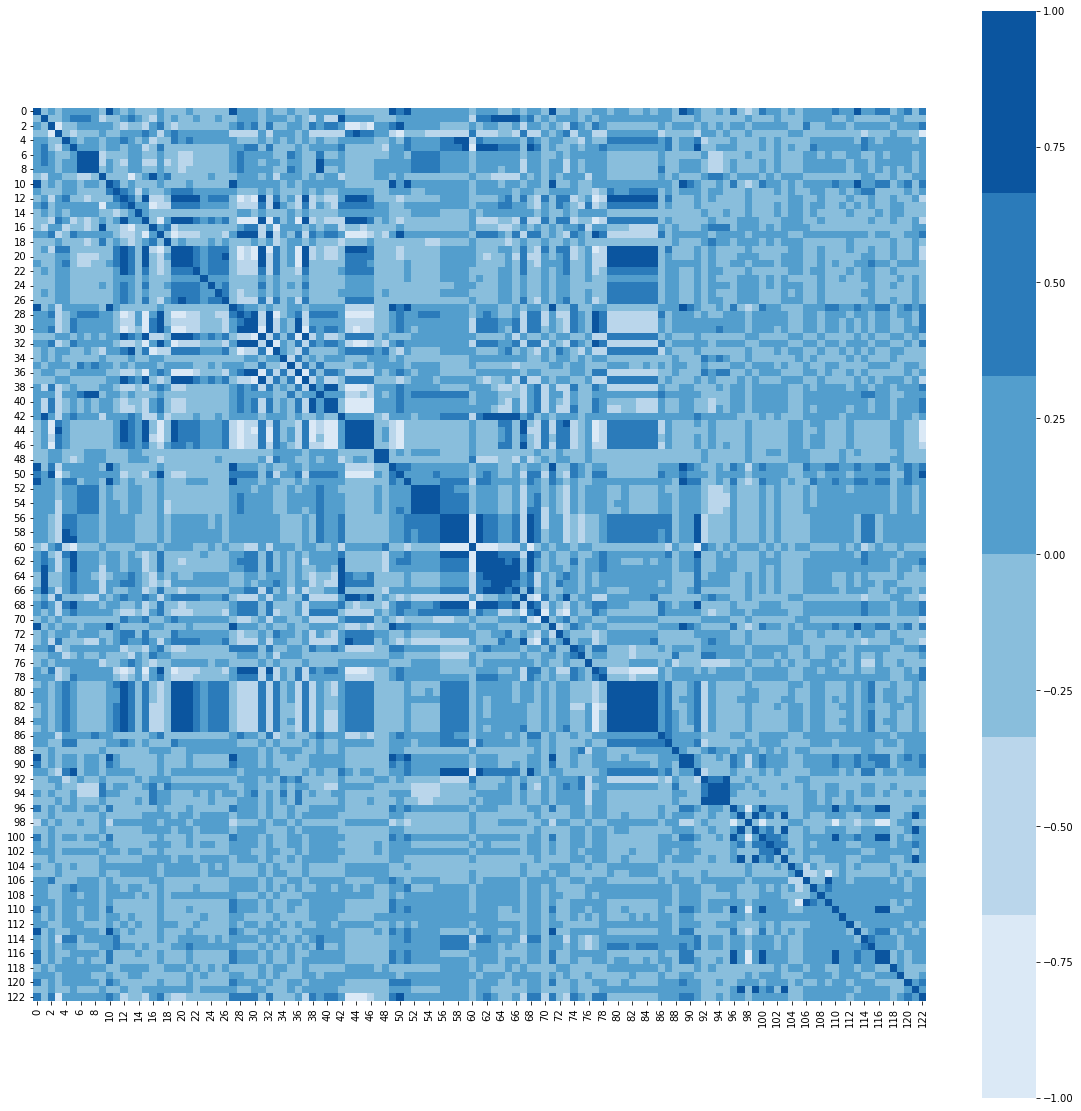

In [112]:
frames = [train_set, test_set]
data_set = pd.concat(frames) # after data imputation, both train and test data.

correlation = data_set.corr()
ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(correlation, vmin=-1, vmax=1, center=0, cmap=sns.color_palette("Blues"), square=True)

(d) Calculate the Coefficient of Variation CV for each feature, where CV = s/m , in
which s is sample standard deviation and m is sample mean.

In [113]:
# 122 features
x_frames = [x_train, x_test]
x_data = pd.concat(x_frames)
var = np.apply_along_axis(lambda x: np.std(x) / np.mean(x), axis = 1, arr = np.array(x_data).T)
cv = pd.DataFrame(var, columns=["CV"])
cv

,CV
0,2.202950
1,0.353210
2,1.410567
3,0.323700
4,1.358821
...,...
117,0.701026
118,0.120441
119,0.360209
120,2.554625


(e) Pick $\lfloor \sqrt{128} \rfloor$ features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

pick 11 features with highest CV
feature index: 90    feature name: NumStreet
feature index: 89    feature name: NumInShelters
feature index: 49    feature name: NumIlleg
feature index: 51    feature name: NumImmig
feature index: 120   feature name: LemasPctOfficDrugUn
feature index: 27    feature name: NumUnderPov
feature index: 0     feature name: population
feature index: 10    feature name: numbUrban
feature index: 71    feature name: HousVacant
feature index: 113   feature name: LandArea
feature index: 5     feature name: racePctHisp


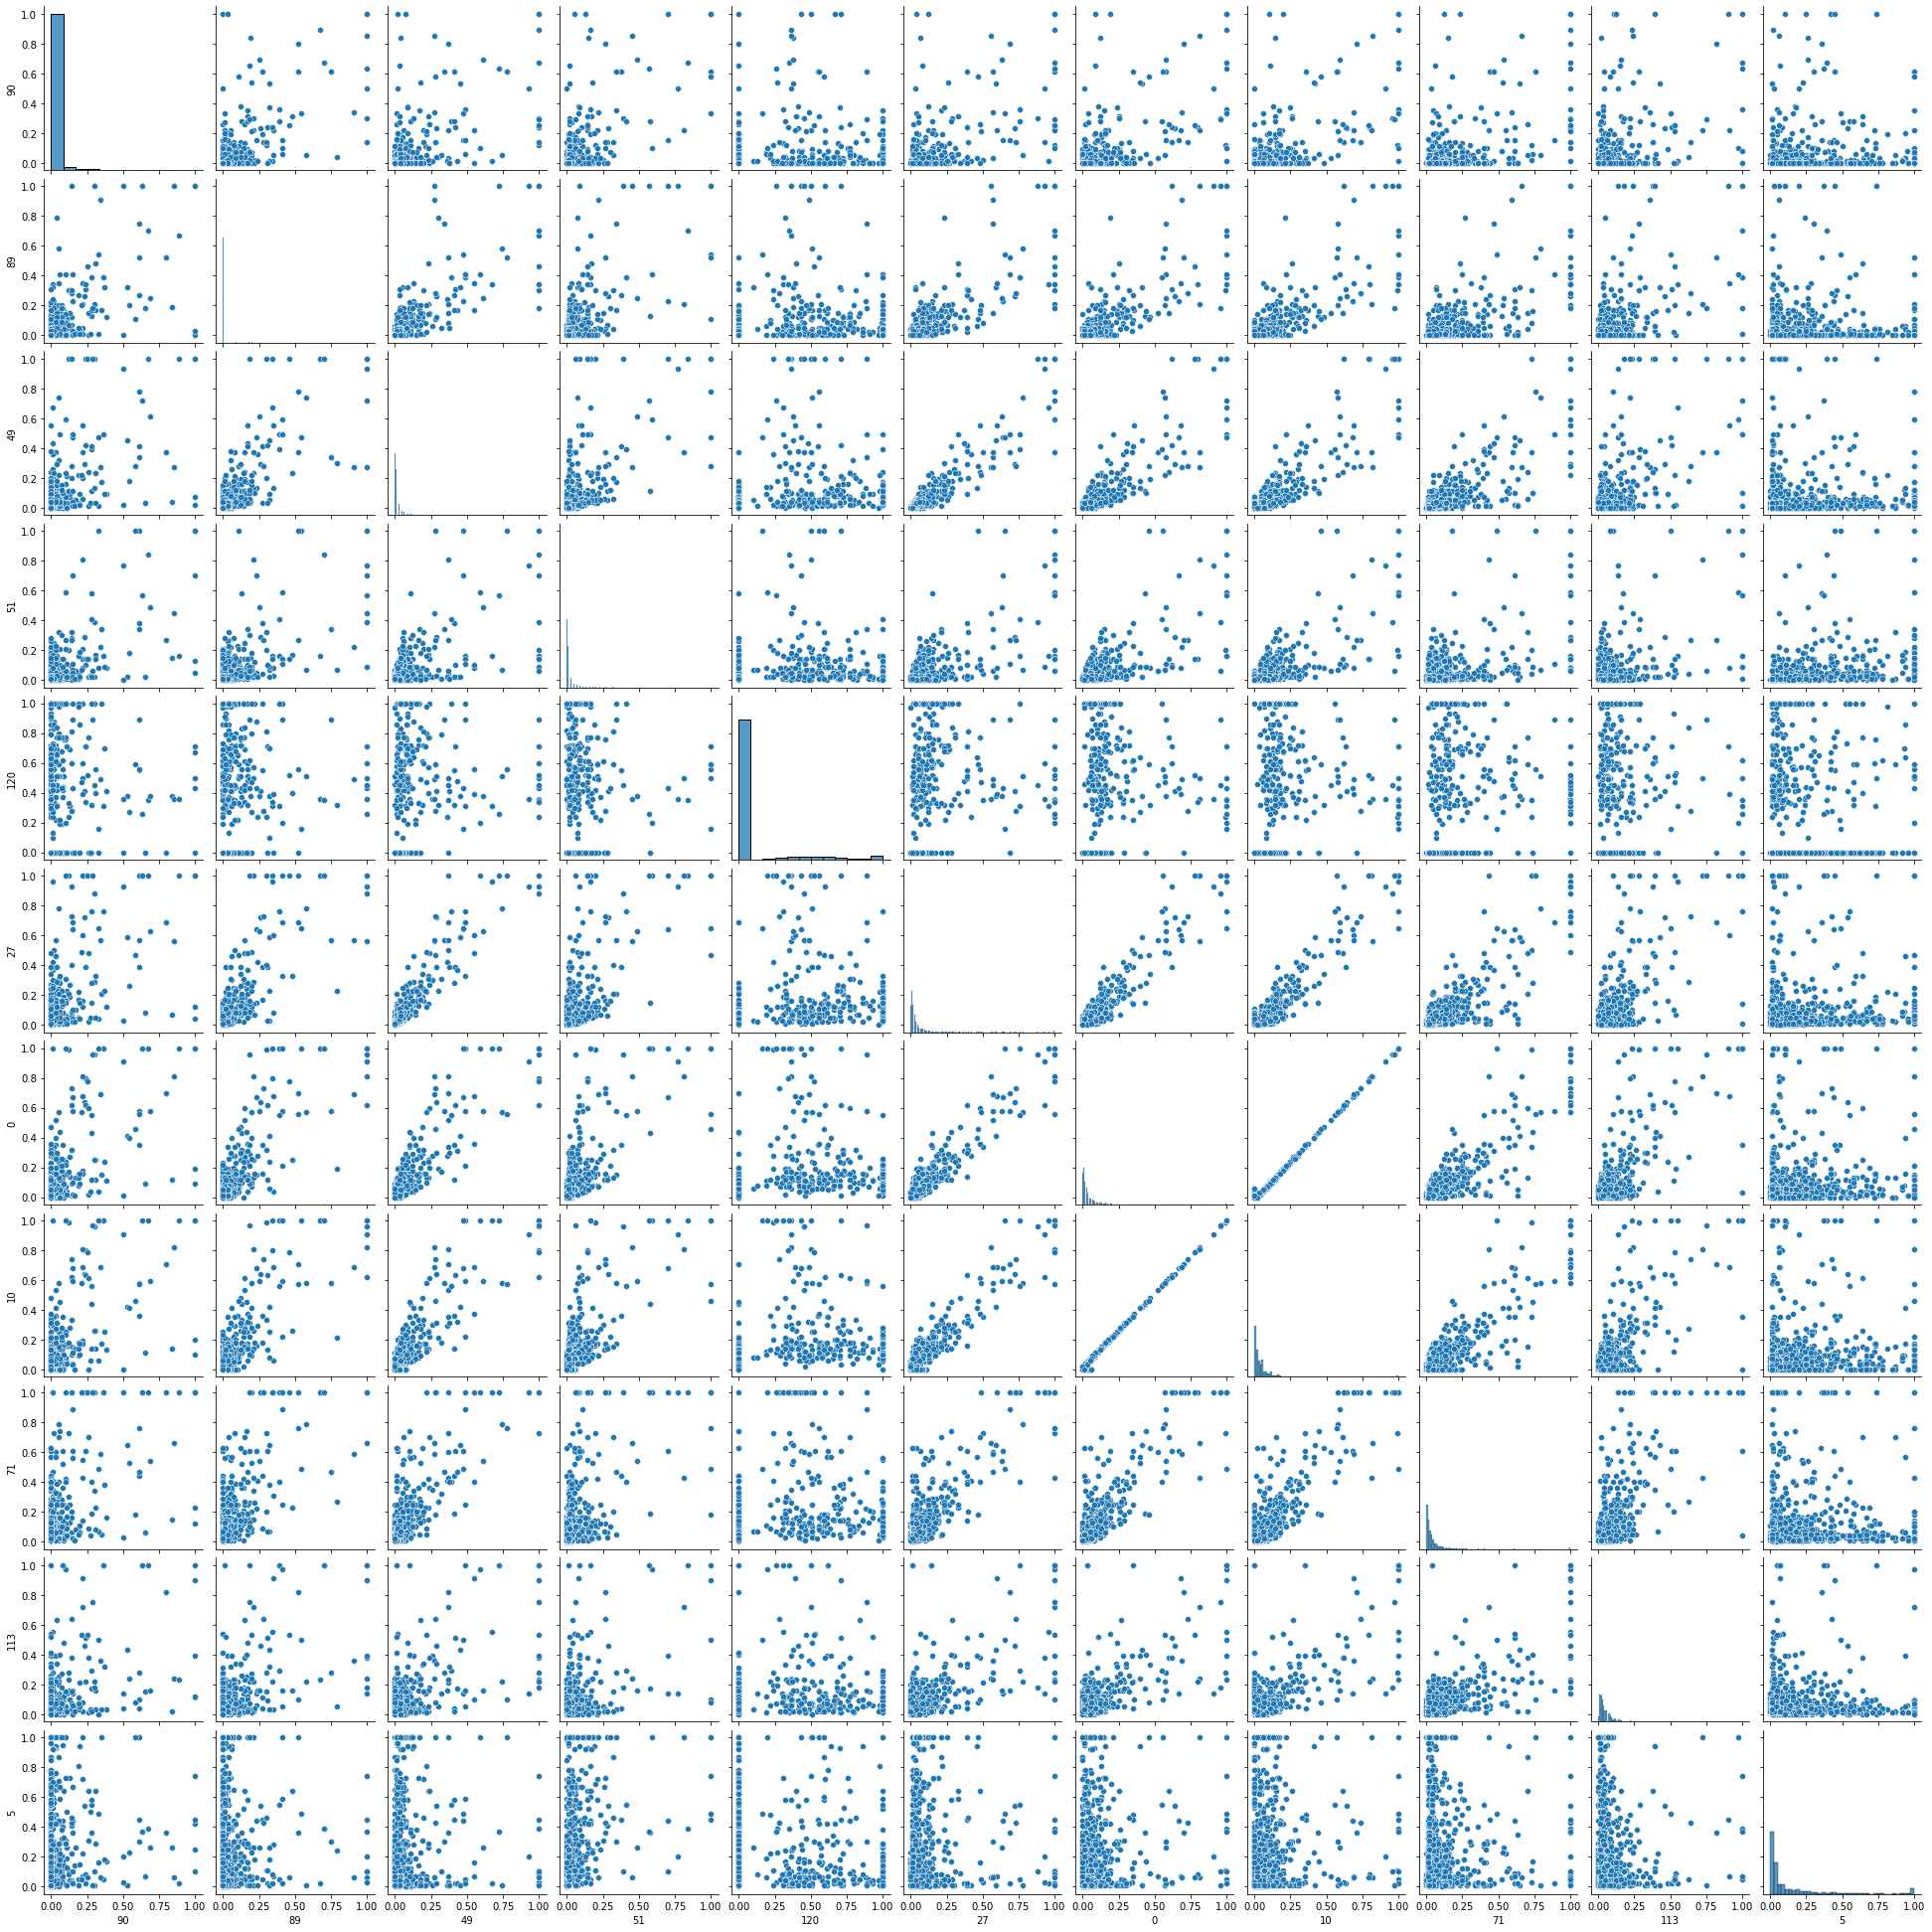

In [114]:
# get cut off point
threshold = math.floor(pow(128,0.5)) # 11
print('pick {} features with highest CV'.format(threshold))
sortedCV = cv.sort_values('CV', ascending=False)

# get first 11 features
features = sortedCV[:threshold].T
trainFeatures = x_train.iloc[:, features.columns] # x_data
for i in features.columns:
    print("feature index: {:<5} feature name: {}".format(i, cols_predictive[i]))
trainFeatures

sns.pairplot(trainFeatures)

It's hard to draw conclusions about significance of those featuree just by the scatter plots.

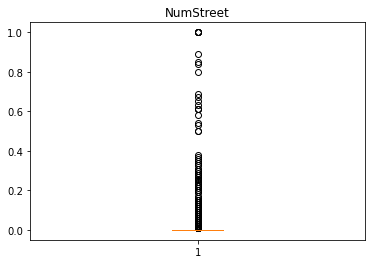

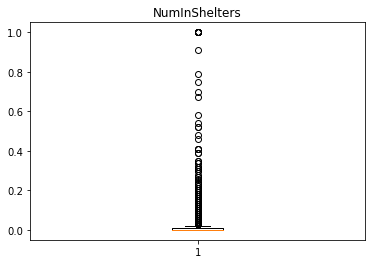

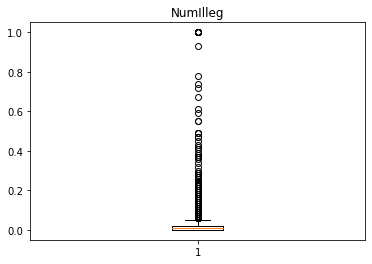

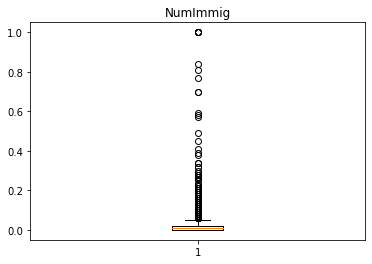

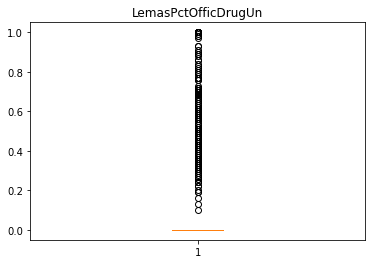

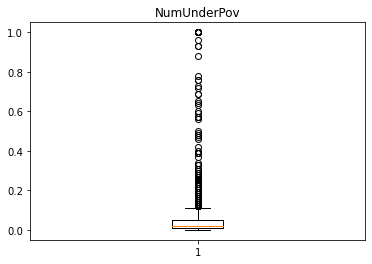

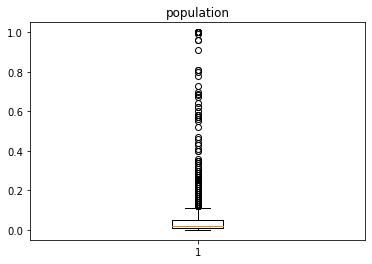

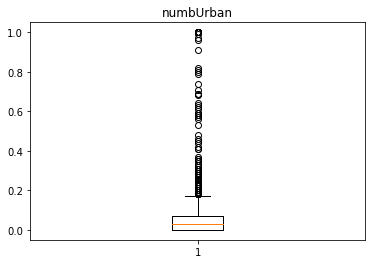

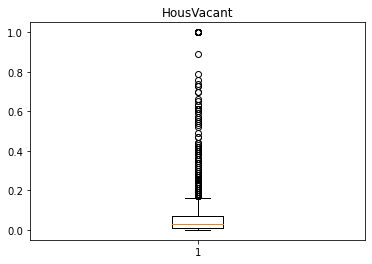

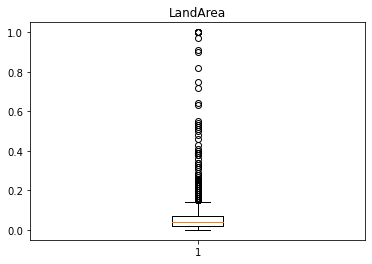

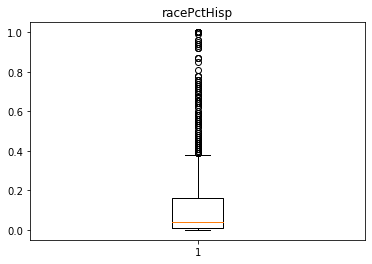

In [115]:
for i in features.columns:    
    plt.boxplot(x_train[i]) 
    plt.title(cols_predictive[i])
    plt.show()

(f) Fit a linear model using least squares to the training set and report the test error.

In [116]:
linearModel = LinearRegression().fit(x_train, y_train)
r_square = linearModel.score(x_test,y_test)
y_pred = linearModel.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
# print("R-Square: ", r_square)
print("MSE: ", mse)

MSE:  4.351501854878322e+16


(g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [117]:
alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

ridgeModel = RidgeCV(alphas=alphas, cv=5, normalize= False).fit(x_train, y_train)
r_square = ridgeModel.score(x_test,y_test)
y_pred = ridgeModel.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print('Best λ: ', ridgeModel.alpha_)
print('R-Square:', r_square)
print('MSE:', mse)

Best λ:  1.0
R-Square: 0.6271188537091108
MSE: 0.017732474992896628


(h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized features (In this data set, features are already normalized). Report the test error for both cases and compare them.

In [118]:
print('Before Standardization:')
lassoModel = LassoCV(alphas=alphas, cv=5, random_state=233).fit(x_train, y_train)
r_square = lassoModel.score(x_test,y_test)
y_pred =lassoModel.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print('Best λ: ', lassoModel.alpha_)
print('R-Square:', r_square)
print('MSE:', mse)

selected_features = lassoModel.coef_ != 0
sel_features = x_train.iloc[:, selected_features]
for i in sel_features.columns:
    print("feature index: {:<5} feature name: {}".format(i, cols_predictive[i]))

Before Standardization:
Best λ:  0.0001
R-Square: 0.6259914394030224
MSE: 0.017786089519102117
feature index: 2     feature name: racepctblack
feature index: 4     feature name: racePctAsian
feature index: 6     feature name: agePct12t21
feature index: 7     feature name: agePct12t29
feature index: 9     feature name: agePct65up
feature index: 11    feature name: pctUrban
feature index: 13    feature name: pctWWage
feature index: 14    feature name: pctWFarmSelf
feature index: 15    feature name: pctWInvInc
feature index: 16    feature name: pctWSocSec
feature index: 17    feature name: pctWPubAsst
feature index: 18    feature name: pctWRetire
feature index: 21    feature name: whitePerCap
feature index: 22    feature name: blackPerCap
feature index: 23    feature name: indianPerCap
feature index: 24    feature name: AsianPerCap
feature index: 25    feature name: OtherPerCap
feature index: 26    feature name: HispPerCap
feature index: 28    feature name: PctPopUnderPov
feature index: 2

In [119]:
standard=StandardScaler()
x_train_stand, x_test_stand = standard.fit_transform(x_train), standard.fit_transform(x_test)

lassoModel2 = LassoCV(alphas=alphas, cv=5, random_state=233).fit(x_train_stand, y_train)
r_square = lassoModel2.score(x_test_stand, y_test)
y_pred =lassoModel2.predict(x_test_stand)
mse = mean_squared_error(y_test,y_pred)
print('After standized features:')
print('Best λ: ', lassoModel.alpha_)
print('R-Square:', r_square)
print('MSE:', mse)

After standized features:
Best λ:  0.0001
R-Square: 0.6225621470737626
MSE: 0.017949170546600605


Based on the above results, there is very small difference between non-standarded data and standarded data. And we tend to have a smaller MSE before standalization.

(i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained. 

In [120]:
# reference: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
# reference: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab11-py.html
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score, KFold

# PCA is effected by scale so need to scale the features in data before applying PCA.
pca = PCA()
X_reduced = pca.fit_transform(scale(x_train))
X_test_reduced = pca.fit_transform(scale(x_test))
kf_10 = KFold(n_splits=10, shuffle=True, random_state=1)
regr = LinearRegression()
MSE = []
for i in np.arange(1, 123):
    score = -1*cross_val_score(regr, X_reduced[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    MSE.append(score)
best_m = MSE.index(min(MSE)) + 1
print('best M:', best_m)

best M: 96


In [121]:
pca = PCA(n_components=best_m)
x_train_reduced = pca.fit_transform(scale(x_train))
x_test_reduced = pca.fit_transform(scale(x_test))
regr = LinearRegression()
reg_pca = regr.fit(x_train_reduced, y_train)
predict = reg_pca.predict(x_test_reduced)
MSE = mean_squared_error(y_test, predict)
r_square = reg_pca.score(x_test_reduced, y_test)
print('MSE:', MSE)
print('R^2:', r_square)

MSE: 0.04537484060599323
R^2: 0.045851039705014696


In [122]:
! conda install py-xgboost --yes

Solving environment: done

# All requested packages already installed.



(j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost5 to fit the model tree. Determine α (the regularization term) using cross-validation.

In [123]:
import xgboost as xgb

# convert to xgb matrix
train_data_dmatrix = xgb.DMatrix(data=x_train, label=y_train)
test_data_dmatrix = xgb.DMatrix(data=x_test, label=y_test)
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10]
RMSE = list()
for a in alphas:
    params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1, 'max_depth': 5, 'alpha': a} # reg:linear
    cv_results = xgb.cv(dtrain=train_data_dmatrix, params=params, nfold=5, num_boost_round=25, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)
    RMSE.append(cv_results["test-rmse-mean"].tail(1).tolist()[0])
best = alphas[RMSE.index(min(RMSE))]
print('Best alpha:', best)

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=best, n_estimators=25)
xg_reg.fit(x_train, y_train)
pred = xg_reg.predict(x_test)
MSE = mean_squared_error(y_test, pred)
# r_square = xg_reg.score(x_test, y_test)
print('MSE:', MSE)

Best alpha: 0.001
MSE: 0.01762062605037555
